In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("PlaylistDatasets/Dataset.csv")
df = df.drop(['id', 'liveness'], axis=1)

#df.isnull().any() #checking if any column has null values

x = df.iloc[:, 2:-1].values #training features of all columns (except first 3 and mood column)
y = df.iloc[:, -1].values #target variable of mood column

#encoding the target variable y (changes the mood column to number values)
le = LabelEncoder()
y = le.fit_transform(y)

#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#standardising the data: https://simple-machine-learning-implementation-with-python.readthedocs.io/en/latest/Naive_Bayes_With_Sklearn.html
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#prints what each encoded label means: https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas
le.fit(df['mood'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)

#for labelling the confusion matrix with the mood names in le_name_mapping
mood_names = list(le_name_mapping.keys())
#print(mood_names)



Accuracy: 0.6446700507614214
         Calm  Excited  Happy  Sad
Calm       32        3     11    1
Excited     5       35     10    1
Happy       7        6     22    0
Sad        22        2      2   38
              precision    recall  f1-score   support

        Calm       0.48      0.68      0.57        47
     Excited       0.76      0.69      0.72        51
       Happy       0.49      0.63      0.55        35
         Sad       0.95      0.59      0.73        64

    accuracy                           0.64       197
   macro avg       0.67      0.65      0.64       197
weighted avg       0.71      0.64      0.66       197



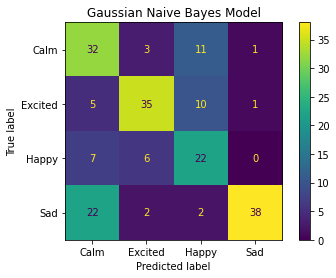

In [8]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_test)
#print(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

#creating a df from the confusion matrix
gnb_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=mood_names, columns=mood_names)
print(gnb_matrix)

print(classification_report(y_test, y_pred, target_names=mood_names))

#plotting the confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=mood_names)
disp.plot()
disp.ax_.set_title("Gaussian Naive Bayes Model")
plt.savefig("DataVis/gnb_confusion_matrix.png")
plt.show()



Accuracy: 0.6598984771573604
         Calm  Excited  Happy  Sad
Calm       25        3     13    6
Excited     4       33     14    0
Happy       3        6     26    0
Sad        12        3      3   46
              precision    recall  f1-score   support

        Calm       0.57      0.53      0.55        47
     Excited       0.73      0.65      0.69        51
       Happy       0.46      0.74      0.57        35
         Sad       0.88      0.72      0.79        64

    accuracy                           0.66       197
   macro avg       0.66      0.66      0.65       197
weighted avg       0.70      0.66      0.67       197



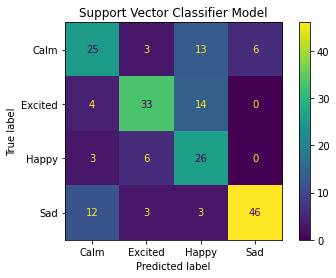

In [9]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

svc_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=mood_names, columns=mood_names)
print(svc_matrix)

print(classification_report(y_test, y_pred, target_names=mood_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=mood_names)
disp.plot()
disp.ax_.set_title("Support Vector Classifier Model")
plt.savefig("DataVis/svc_confusion_matrix.png")
plt.show()


Accuracy: 0.5482233502538071
         Calm  Excited  Happy  Sad
Calm       24        4      9   10
Excited     9       25     15    2
Happy       5       10     20    0
Sad        17        1      7   39
              precision    recall  f1-score   support

        Calm       0.44      0.51      0.47        47
     Excited       0.62      0.49      0.55        51
       Happy       0.39      0.57      0.47        35
         Sad       0.76      0.61      0.68        64

    accuracy                           0.55       197
   macro avg       0.55      0.55      0.54       197
weighted avg       0.58      0.55      0.56       197



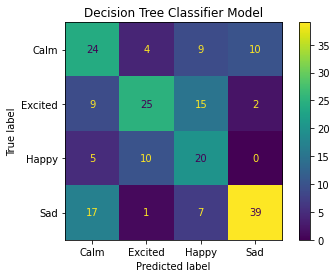

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

tree_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=mood_names, columns=mood_names)
print(tree_matrix)

print(classification_report(y_test, y_pred, target_names=mood_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=mood_names)
disp.plot()
disp.ax_.set_title("Decision Tree Classifier Model")
plt.savefig("DataVis/dtree_confusion_matrix.png")
plt.show()


Accuracy: 0.6852791878172588
         Calm  Excited  Happy  Sad
Calm       23        3     14    7
Excited     2       37     12    0
Happy       2        7     26    0
Sad         8        3      4   49
              precision    recall  f1-score   support

        Calm       0.66      0.49      0.56        47
     Excited       0.74      0.73      0.73        51
       Happy       0.46      0.74      0.57        35
         Sad       0.88      0.77      0.82        64

    accuracy                           0.69       197
   macro avg       0.68      0.68      0.67       197
weighted avg       0.72      0.69      0.69       197



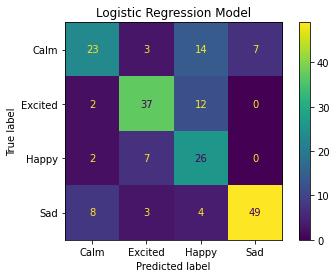

In [11]:
#train the dataset on the logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

lr_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=mood_names, columns=mood_names)
print(lr_matrix)

print(classification_report(y_test, y_pred, target_names=mood_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=mood_names)
disp.plot()
disp.ax_.set_title("Logistic Regression Model")
plt.savefig("DataVis/lr_confusion_matrix.png")
plt.show()

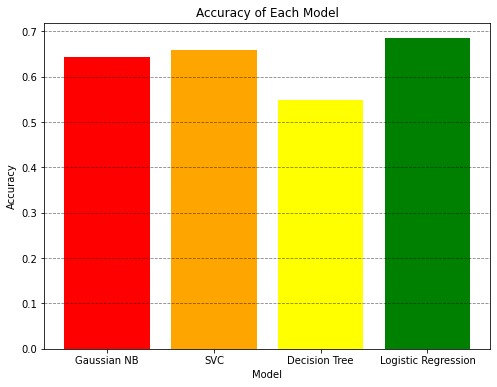

In [12]:
#bar chart of each model's accuracy
models = ['Gaussian NB', 'SVC', 'Decision Tree', 'Logistic Regression']
gnb_acc = accuracy_score(y_test, gaussian.predict(x_test))
svm_acc = accuracy_score(y_test, svm.predict(x_test))
dtree_acc = accuracy_score(y_test, tree.predict(x_test))
lr_acc = accuracy_score(y_test, lr.predict(x_test))
accuracies = [gnb_acc, svm_acc, dtree_acc, lr_acc]

fig, ax = plt.subplots(figsize = (8, 6))
colours = ['red', 'orange', 'yellow', 'green']
ax.bar(models, accuracies, color=colours)
ax.set(title = "Accuracy of Each Model", xlabel = "Model", ylabel = "Accuracy")
ax.grid(axis = 'y', linestyle = '--', color = 'black', alpha = 0.5)
plt.savefig("DataVis/models_accuracy.png")
plt.show()

